# Decision Tree
* Source : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Very Simple Version


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
clf = DecisionTreeClassifier(random_state=0)

## Data

| - | 0 | 1 |
|---|---|---|
| 0 | a | c |
| 1 | b | c |



In [2]:
from sklearn import tree
X = [[0, 0], [0,1], [1,0], [1, 1]]
Y = ['a', 'c', 'b', 'c']

## Training

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

## Training Result

In [ ]:
# Apt install for graphviz
# !x=$(cat /etc/apt/sources.list|grep "http://kr.archive.ubuntu.com/ubuntu/");[ ${#x} -eq 0 ] && echo "deb http://kr.archive.ubuntu.com/ubuntu/ bionic universe" >> /etc/apt/sources.list
# !apt -y update  --upgrade
# !apt -y install python-pydot python-pydot-ng graphviz
# !pip install --upgrade pip
# !pip install pydotplus

    

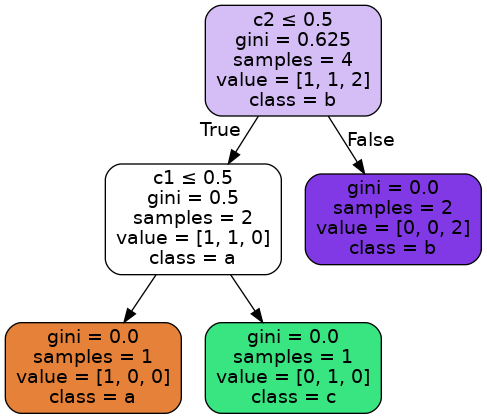

In [4]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, feature_names=['c1','c2'],
                          class_names=np.array(['a', 'c', 'b']), filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Implementation


In [5]:
clf.predict([[0.1, 0.1]])

array(['a'], dtype='<U1')

In [6]:
clf.predict([[0.1, 1.1]])

array(['c'], dtype='<U1')

In [7]:
clf.predict([[1.1,0.1]])

array(['b'], dtype='<U1')

In [8]:
clf.predict([[1.1, 1.1]])

array(['c'], dtype='<U1')